In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from wordcloud import WordCloud

In [24]:
# Path to the dataset
zip_path = r'C:\Users\bhard\OneDrive\Desktop\My all Projects\Unveiling the Android App Market Analyzing Google Play Store Data\apps.csv.zip'
extract_path = r'C:\Users\bhard\OneDrive\Desktop\My all Projects\Unveiling the Android App Market Analyzing Google Play Store Data'



In [14]:
# Data Preparation
print("Initial Data Info:")
print(df.info())

# Print column names and shape of the DataFrame
print("Columns in DataFrame:")
print(df.columns.tolist())

print("\nShape of DataFrame:")
print(df.shape)

# Display first few rows
print("\nSample Data:")
print(df.head())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 7027 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7027 non-null   int64  
 1   App             7027 non-null   object 
 2   Category        7027 non-null   object 
 3   Rating          7027 non-null   float64
 4   Reviews         7027 non-null   object 
 5   Size            7027 non-null   float64
 6   Installs        7027 non-null   int32  
 7   Type            7027 non-null   object 
 8   Price           7027 non-null   float64
 9   Content Rating  7027 non-null   object 
 10  Genres          7027 non-null   object 
 11  Last Updated    7027 non-null   object 
 12  Current Ver     7023 non-null   object 
 13  Android Ver     7025 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(9)
memory usage: 796.0+ KB
None
Columns in DataFrame:
['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Si

In [5]:
# Clean and correct data types
df.dropna(subset=['Category', 'Rating', 'Size', 'Installs', 'Price', 'Reviews'], inplace=True)

In [15]:
# Convert columns to string before applying .str methods
df['Size'] = df['Size'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)
df['Installs'] = df['Installs'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int)
df['Price'] = df['Price'].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)

In [7]:
# Convert 'Rating' and 'Reviews' to numeric values
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Handle possible NaN values after conversion
df.dropna(subset=['Rating', 'Reviews'], inplace=True)

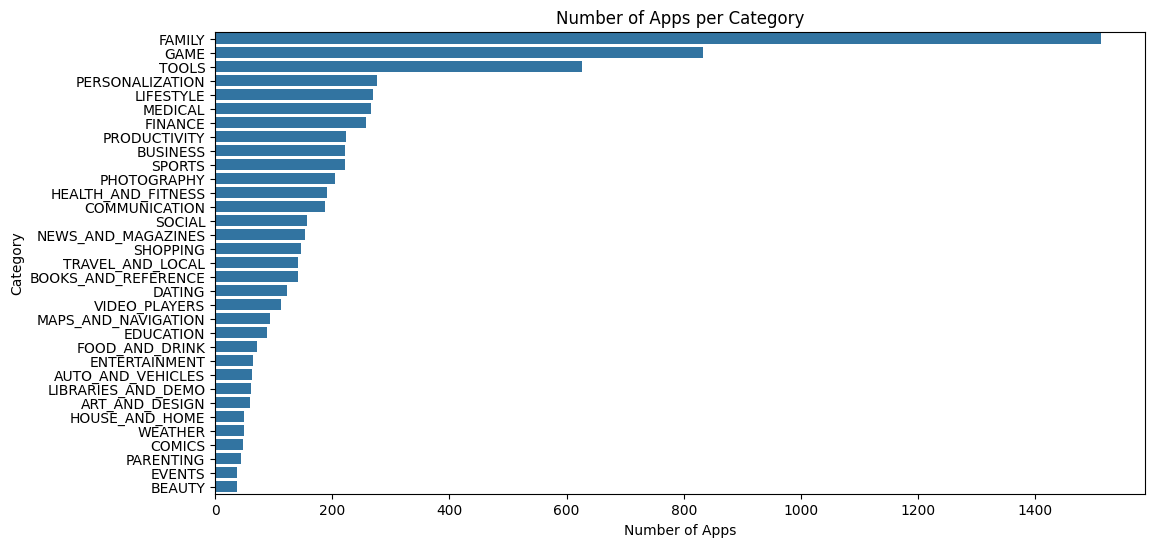

In [8]:
# Category Exploration
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Number of Apps per Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

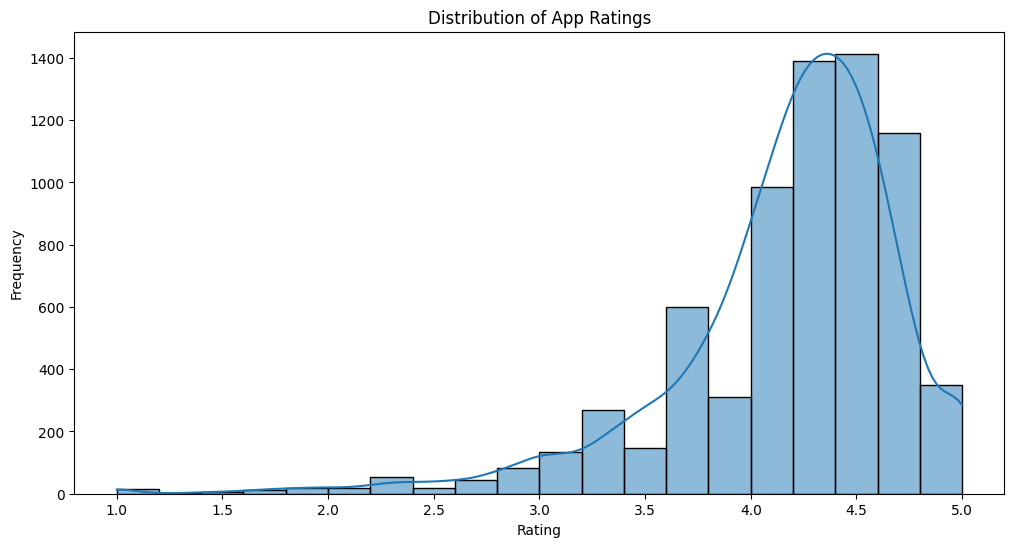

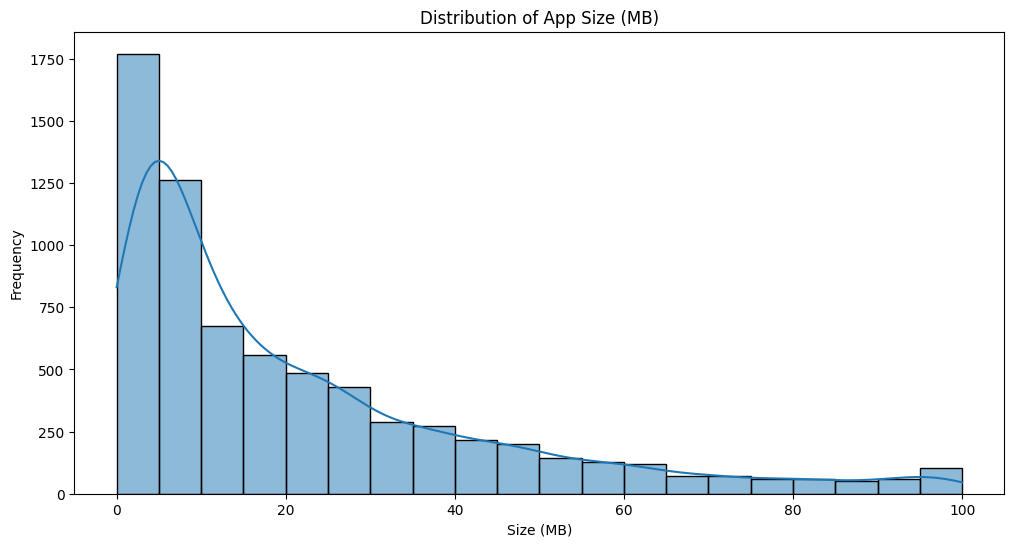

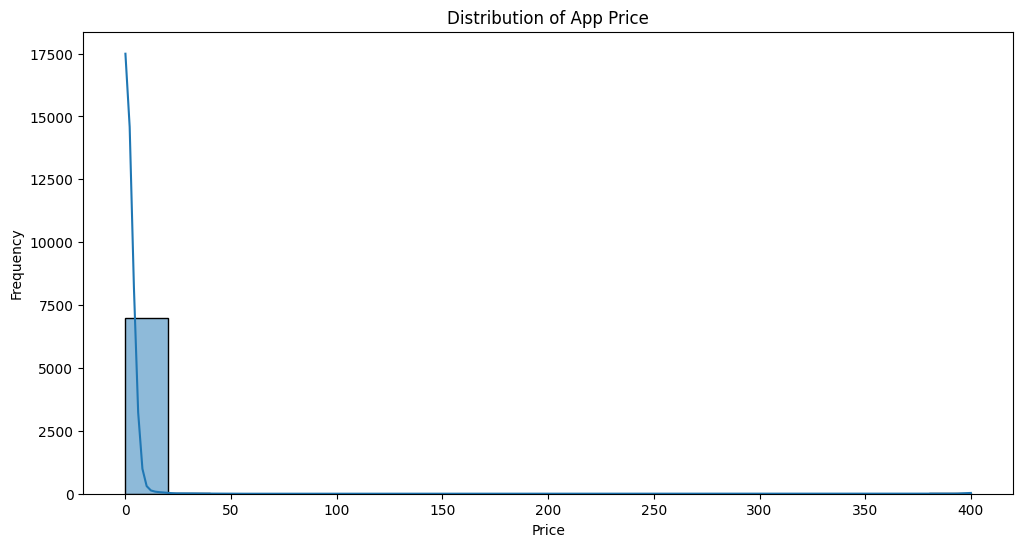

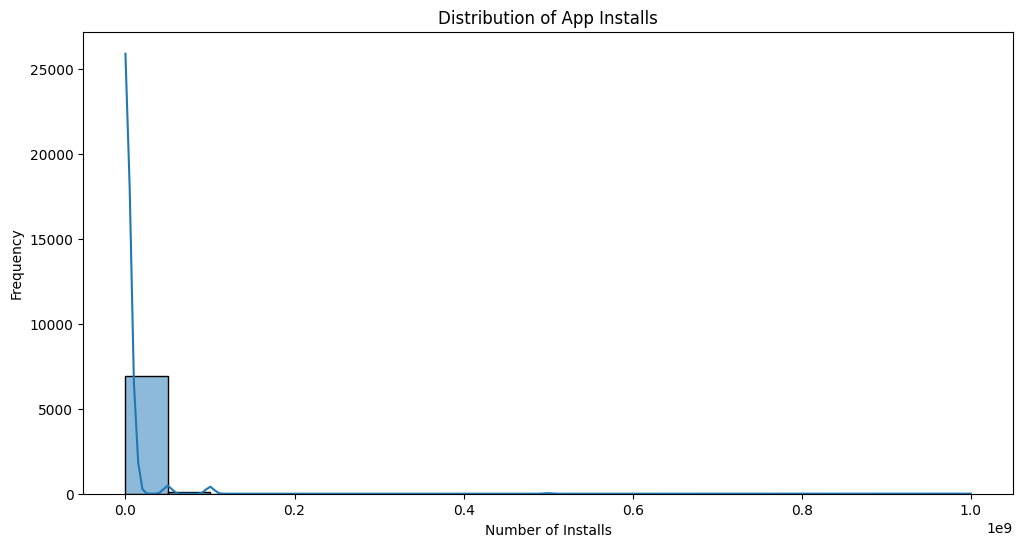

In [10]:
# Metrics Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Size'], bins=20, kde=True)
plt.title('Distribution of App Size (MB)')
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of App Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Installs'], bins=20, kde=True)
plt.title('Distribution of App Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')
plt.show()

In [16]:
print(df['Reviews'].head())

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object


In [17]:
# Sentiment Analysis
# Ensure there are no NaN values and convert to string
df['Reviews'] = df['Reviews'].astype(str)

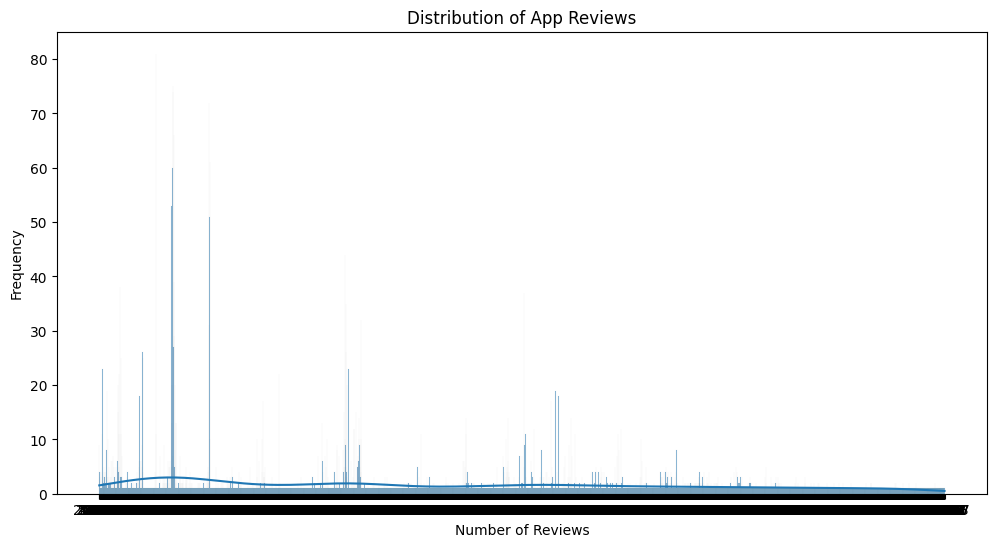

Data Analysis Complete.


In [19]:
# Reviews Analysis (as integers)
plt.figure(figsize=(12, 6))
sns.histplot(df['Reviews'], bins=20, kde=True)
plt.title('Distribution of App Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

print("Data Analysis Complete.")